# Ecommerce Project 

#### Project Overview:

Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions / meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Overview

The file contain Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

 - Avg. Session Length: Average session of in-store style advice sessions.

 - Time on App: Average time spent on App in minutes

 - Time on Website: Average time spent on Website in minutes

 - Length of Membership: How many years the customer has been a member.

In [2]:
df = pd.read_csv('Data/Ecommerce Customers.txt')

In [3]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Exploratory Data Analysis 

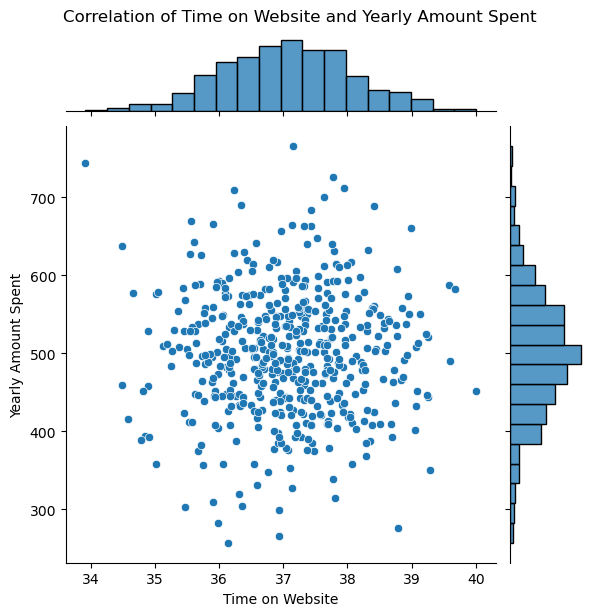

In [6]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, kind='scatter')
plt.suptitle('Correlation of Time on Website and Yearly Amount Spent', y=1.02)
plt.show()

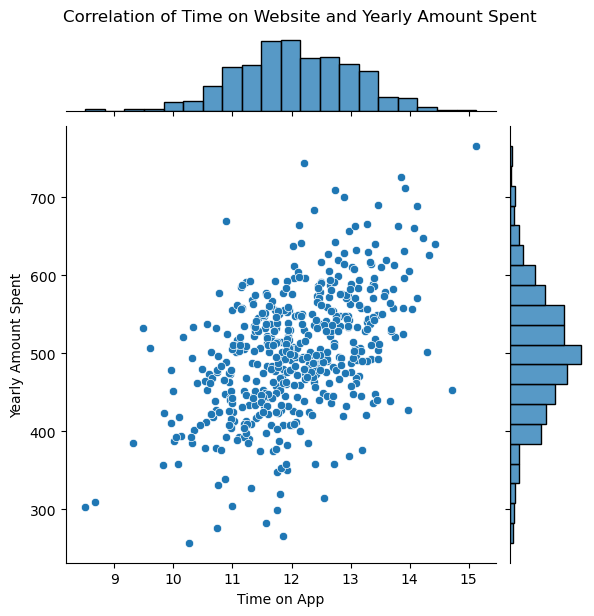

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df, kind='scatter')
plt.suptitle('Correlation of Time on Website and Yearly Amount Spent', y=1.02)
plt.show()

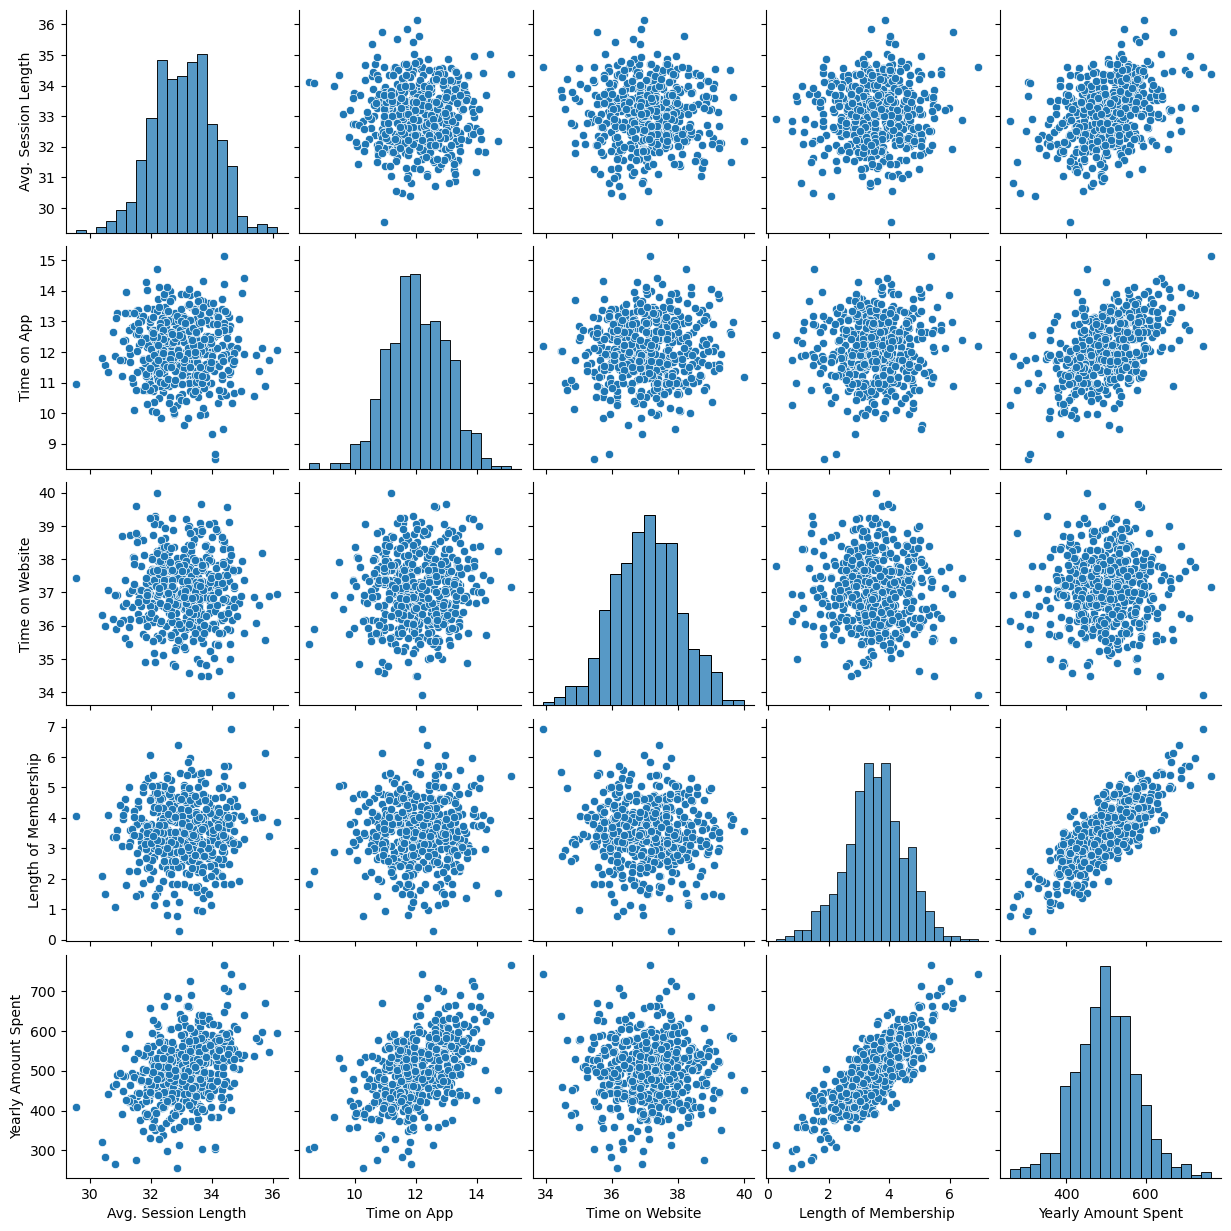

In [8]:
sns.pairplot(data=df)
plt.show()

According to above plot, If we see 'Yearly Amount Spent' and 'Length of Membership' relationship plot, we observe that it is highly correlated and it could be good fit for ML model.


Let's check the regression line for 'Yearly Amount Spent' and 'Length of Membership' feature.

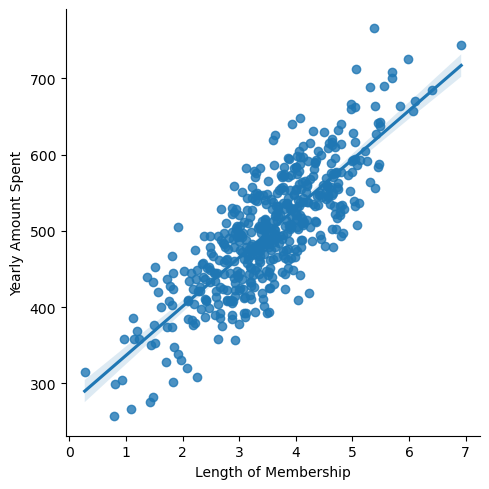

In [9]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)
plt.show()

# Machine Learning Model

#### *Training and Testing Data*

In [11]:
x = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=1)

print('X Train: ',x_train.shape)
print('X Test: ',x_test.shape)
print('Y Train: ',y_train.shape)
print('Y Test: ',y_test.shape)

X Train:  (350, 4)
X Test:  (150, 4)
Y Train:  (350,)
Y Test:  (150,)


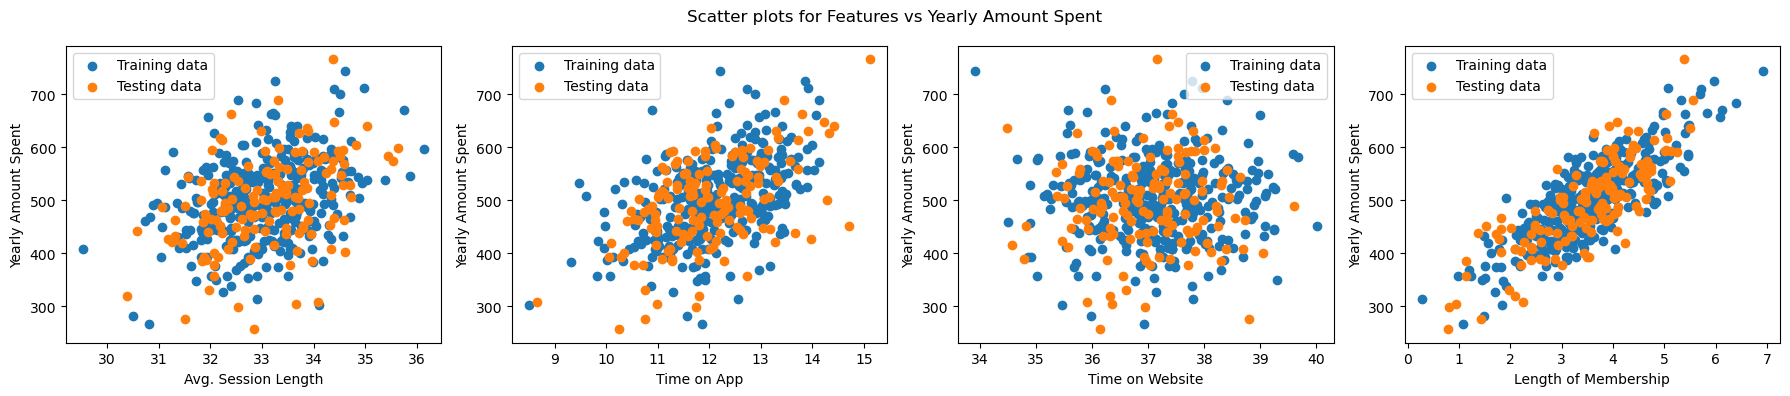

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,4))

for i, feature in enumerate(x.columns):
    axes[i].scatter(x_train[feature], y_train, label='Training data')
    axes[i].scatter(x_test[feature], y_test, label='Testing data')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Yearly Amount Spent')
    axes[i].legend()

plt.suptitle('Scatter plots for Features vs Yearly Amount Spent')
plt.tight_layout()
plt.show()

#### *Training & Predicting the Model*

In [14]:
from sklearn.linear_model import LinearRegression


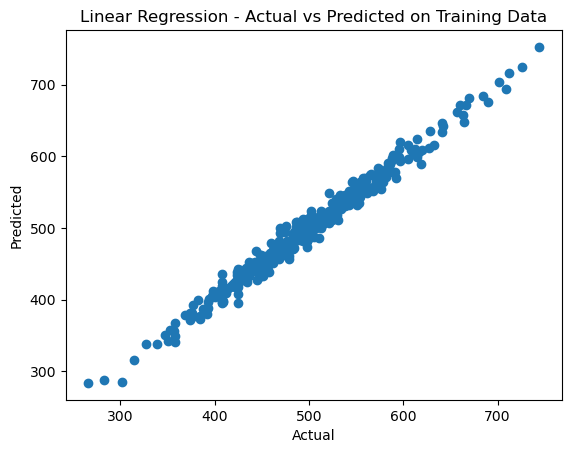

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)

# Making predictions on the training data
y_train_pred = model.predict(x_train)

# Plotting the linear regression line
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression - Actual vs Predicted on Training Data')
plt.show()


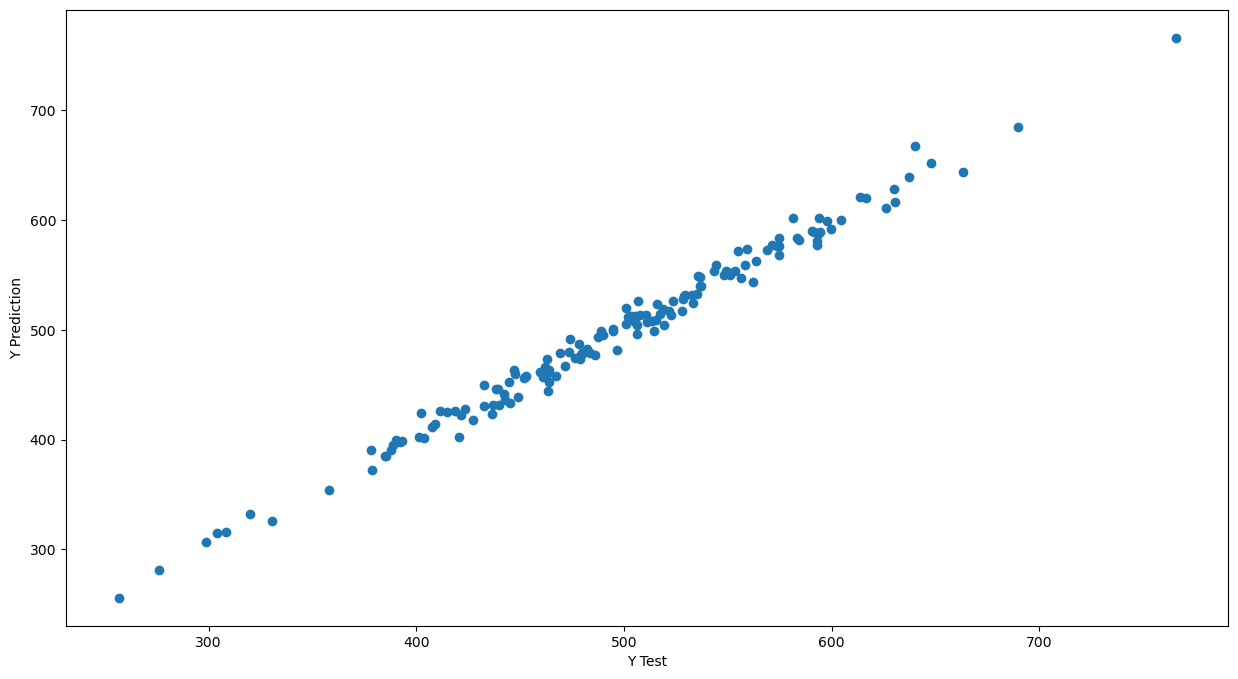

In [16]:
pred = model.predict(x_test)
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')
plt.show()

#### *Evaluating the Model*

In [17]:
from sklearn import metrics

MAE:  7.099124594093833
MSE:  80.90062369759926
RMSE:  8.994477399915976 

Variance Score:
R2:  0.9886753424339711


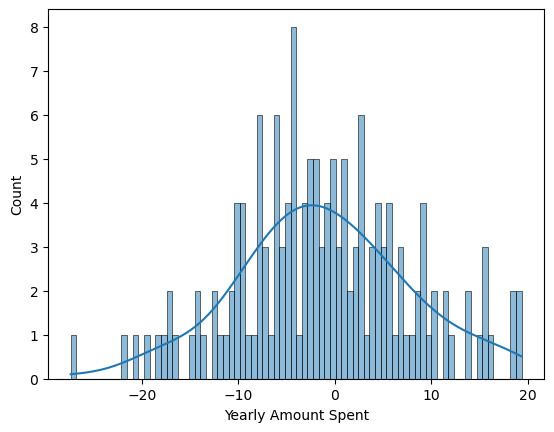

In [18]:
print('MAE: ',metrics.mean_absolute_error(y_test,pred))
print('MSE: ',metrics.mean_squared_error(y_test,pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,pred)),'\n')
print('Variance Score:')
print('R2: ',metrics.explained_variance_score(y_test,pred))
sns.histplot((y_test-pred),bins=80,kde=True)
plt.show()

In [19]:
coef_df = pd.DataFrame(model.coef_,x.columns,columns=['Coefficent'])
coef_df

,Coefficent
Avg. Session Length,25.827920
Time on App,38.809001
Time on Website,0.281743
Length of Membership,61.304799


#### Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.

Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.

Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.

Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

Time on App - Coefficients: [0.02929094]
Time on App - Intercept: 3.1804328795089676
Time on Website - Coefficients: [-0.0470539]
Time on Website - Intercept: 5.277299943098408


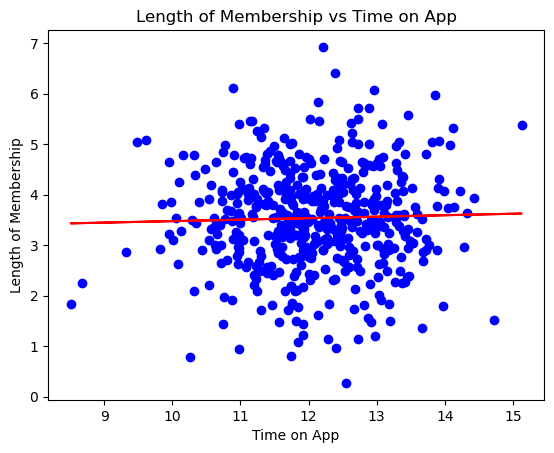

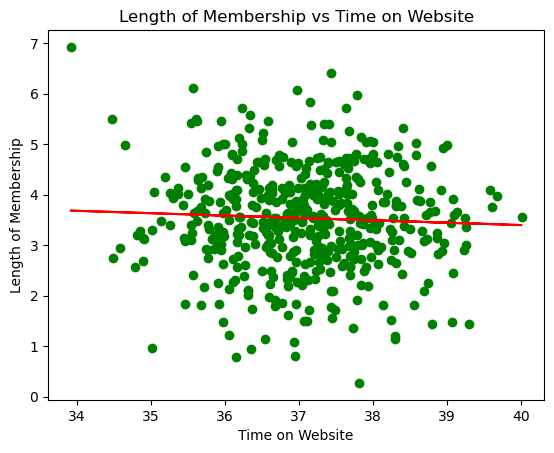

In [20]:
x = df[['Time on App', 'Time on Website']]
y = df['Length of Membership']

regressor = LinearRegression()


regressor.fit(x[['Time on App']], y)
print("Time on App - Coefficients:", regressor.coef_)
print("Time on App - Intercept:", regressor.intercept_)

regressor.fit(x[['Time on Website']], y)
print("Time on Website - Coefficients:", regressor.coef_)
print("Time on Website - Intercept:", regressor.intercept_)


regressor.fit(x[['Time on App']], y)
plt.scatter(x['Time on App'], y, color='blue')
plt.plot(x['Time on App'], regressor.predict(x[['Time on App']]), color='red')
plt.title('Length of Membership vs Time on App')
plt.xlabel('Time on App')
plt.ylabel('Length of Membership')
plt.show()


regressor.fit(x[['Time on Website']], y)
plt.scatter(x['Time on Website'], y, color='green')
plt.plot(x['Time on Website'], regressor.predict(x[['Time on Website']]), color='red')
plt.title('Length of Membership vs Time on Website')
plt.xlabel('Time on Website')
plt.ylabel('Length of Membership')
plt.show()


Time on App: The coefficient is 0.029. With an intercept of 3.18, the time spent on the app seems to be a positive factor in increasing expenditure.

Time on Website: The coefficient is -0.047. The intercept is 5.28, indicating that more time on the website correlates with lesser spending compared to the app.

### Conclusion:
Based on the provided data and analysis, focusing efforts on enhancing the mobile app experience seems advantageous due to its stronger impact on customer spending. However, a holistic approach that includes improvements to both the app and website while considering user behavior and loyalty could yield the best results.